In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
df = pd.read_csv('UNSW_NB15.csv')
df.head()


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [19]:
# Step 2: Inspect the dataset structure and check for missing values
print("Dataset Overview:")
df.head()
print("\nDataset Structure and Data Types:")
print(df.info())
print("\nMissing values per column:")
print(df.isnull().sum())


Dataset Overview:

Dataset Structure and Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15

In [20]:
# Step 3: Separate features (X) and target (y)
X = df.drop(columns=['label'])
y = df['label']

# Step 4: Identify non-numeric columns
non_numeric_columns = X.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)

# If there are any non-numeric columns, apply one-hot encoding
if len(non_numeric_columns) > 0:
    X = pd.get_dummies(X, columns=non_numeric_columns)

Non-numeric columns: Index(['proto', 'service', 'state', 'attack_cat'], dtype='object')


In [21]:
# Step 5: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# (Optional) Step 6: Perform PCA
# Let's reduce to a smaller number of components, e.g., 2, for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Display the PCA-transformed features
print("\nPCA-transformed features (first 5 rows):")
print(X_pca[:5])



PCA-transformed features (first 5 rows):
[[ 3.23344401  0.40344116]
 [ 3.20189176 -1.07458691]
 [ 4.41486176 -1.09714613]
 [ 3.90192492 -1.34123861]
 [ 1.58615298 -2.64626765]]


In [29]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Step 1: Feature selection using mutual information
# Select top k features that have the most information for predicting the label
k = 20  # for example, select the top 10 features
selector = SelectKBest(mutual_info_classif, k=k)
X_selected = selector.fit_transform(X, y)

# Get the selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected features based on mutual information:", selected_features)

# Step 2: Standardize the selected features
scaler = StandardScaler()
X_selected_scaled = scaler.fit_transform(X_selected)

# Step 3: Apply PCA on selected features
pca = PCA(n_components=2)
X_pca_selected = pca.fit_transform(X_selected_scaled)

# Display the PCA-transformed selected features
print("\nPCA-transformed features (first 5 rows) after feature selection:")
print(X_pca_selected[:5])


Selected features based on mutual information: Index(['id', 'dur', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl',
       'sload', 'dload', 'sinpkt', 'dinpkt', 'sjit', 'tcprtt', 'synack',
       'ackdat', 'smean', 'dmean', 'ct_state_ttl', 'attack_cat_Normal'],
      dtype='object')

PCA-transformed features (first 5 rows) after feature selection:
[[-1.29950472 -0.77210157]
 [-2.86739063 -2.01246667]
 [-3.48608066 -0.02468204]
 [-1.57596887 -1.0982001 ]
 [-2.08539403  1.28911802]]


In [32]:
selected_features = ['id', 'dur', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl',
       'sload', 'dload', 'sinpkt', 'dinpkt', 'sjit', 'tcprtt', 'synack',
       'ackdat', 'smean', 'dmean', 'ct_state_ttl']
data_selected = df[selected_features]

# Display the first few rows
data_selected.head()

,id,dur,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sinpkt,dinpkt,sjit,tcprtt,synack,ackdat,smean,dmean,ct_state_ttl
0,1,0.121478,4,258,172,74.087490,252,254,14158.942380,8495.365234,24.295600,8.375000,30.177547,0.000000,0.000000,0.000000,43,43,0
1,2,0.649902,38,734,42014,78.473372,62,252,8395.112305,503571.312500,49.915000,15.432865,61.426934,0.000000,0.000000,0.000000,52,1106,1
2,3,1.623129,16,364,13186,14.170161,62,252,1572.271851,60929.230470,231.875571,102.737203,17179.586860,0.111897,0.061458,0.050439,46,824,1
3,4,1.681642,12,628,770,13.677108,62,252,2740.178955,3358.622070,152.876547,90.235726,259.080172,0.000000,0.000000,0.000000,52,64,1
4,5,0.449454,6,534,268,33.373826,254,252,8561.499023,3987.059814,47.750333,75.659602,2415.837634,0.128381,0.071147,0.057234,53,45,1


In [33]:
# Standardize the data
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data_selected)


In [34]:
# Initialize PCA
pca = PCA()

# Fit PCA to the standardized data
pca.fit(data_standardized)

# Extract the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Print explained variance ratio
explained_variance_ratio


array([2.18545023e-01, 1.76747364e-01, 1.04026366e-01, 8.97623184e-02,
       7.04389664e-02, 6.68001725e-02, 5.13876226e-02, 4.42971121e-02,
       4.05079159e-02, 3.26614329e-02, 2.29139751e-02, 1.73715876e-02,
       1.62960791e-02, 1.52064747e-02, 1.28696113e-02, 1.10476220e-02,
       8.62852191e-03, 4.91834455e-04, 4.61068569e-18])

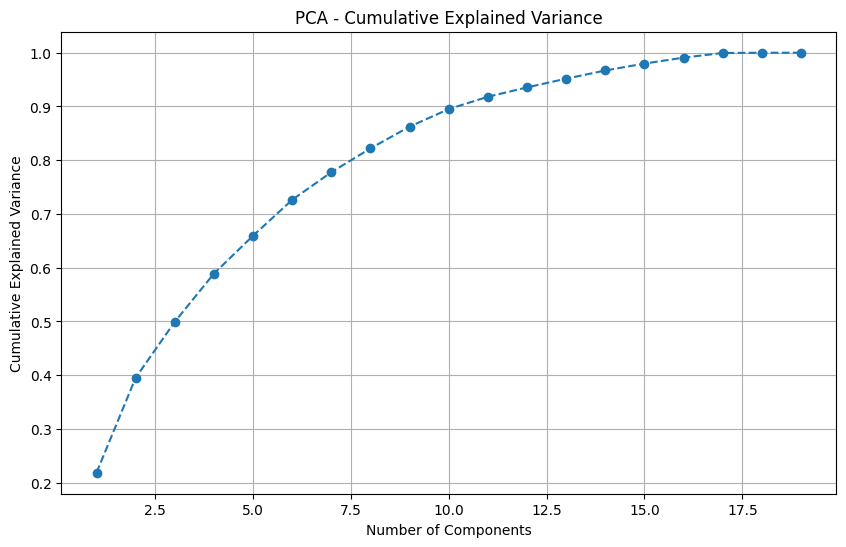

In [36]:
import matplotlib.pyplot as plt
# Calculate cumulative explained variance
cumulative_variance = explained_variance_ratio.cumsum()

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance')
plt.grid(True)
plt.show()


In [38]:
# Determine the number of components needed for 90% variance
optimal_components = next(i for i, total in enumerate(cumulative_variance) if total >= 0.90) + 1
optimal_components


11

In [39]:
# Apply PCA with the optimal number of components
pca_optimal = PCA(n_components=optimal_components)
data_reduced = pca_optimal.fit_transform(data_standardized)

# Display the shape of the transformed dataset
data_reduced.shape


(175341, 11)

In [28]:
# Find the number of components that capture at least 90% of the variance
optimal_components = next(i for i, cumulative in enumerate(cumulative_explained_variance) if cumulative >= 0.90)

print(f'The optimal number of components to capture at least 90% of the variance is: {optimal_components + 1}')

The optimal number of components to capture at least 90% of the variance is: 147


In [29]:
# Initialize PCA with the optimal number of components
pca_optimal = PCA(n_components=optimal_components + 1)

# Fit and transform the scaled features
features_pca = pca_optimal.fit_transform(features_scaled_df)

# Convert the PCA result back to a DataFrame
features_pca_df = pd.DataFrame(features_pca, columns=[f'PC{i + 1}' for i in range(optimal_components + 1)])

# Display the first few rows of the PCA-transformed features
features_pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC138,PC139,PC140,PC141,PC142,PC143,PC144,PC145,PC146,PC147
0,3.170102,-0.235368,0.725159,-1.190631,-0.453708,0.770712,-0.443660,0.140532,-0.021140,-0.123101,...,0.000056,0.000398,0.000179,-0.000095,-0.000021,-0.000087,-5.841049e-06,0.000765,0.003763,0.001157
1,3.151995,1.311308,2.620798,-1.045128,-0.573738,0.241192,-0.416601,0.444083,-0.100396,-0.290524,...,0.000435,-0.001943,-0.001458,-0.000352,0.000102,0.000063,5.601459e-06,-0.047749,0.053130,0.005996
2,4.368344,1.297751,0.954539,-0.971651,0.030903,-0.249168,-0.389153,1.130553,-0.011558,0.675559,...,0.003301,-0.001726,-0.002828,0.000372,-0.000111,0.000551,4.010169e-06,-0.045056,0.008730,-0.009223
3,4.018003,0.634883,0.233884,-2.401935,2.176237,3.551240,12.084891,0.276320,-0.007683,0.314682,...,0.000148,-0.001152,-0.000788,0.000072,0.000134,0.000074,1.179931e-07,-0.035746,0.020483,0.000511
4,1.540697,3.080922,-0.261022,-1.058982,0.415619,0.105475,-0.732089,0.150914,0.018380,-0.499117,...,-0.000582,-0.000412,0.000362,0.000019,-0.000062,0.000016,7.237198e-07,0.004757,-0.044682,-0.007738


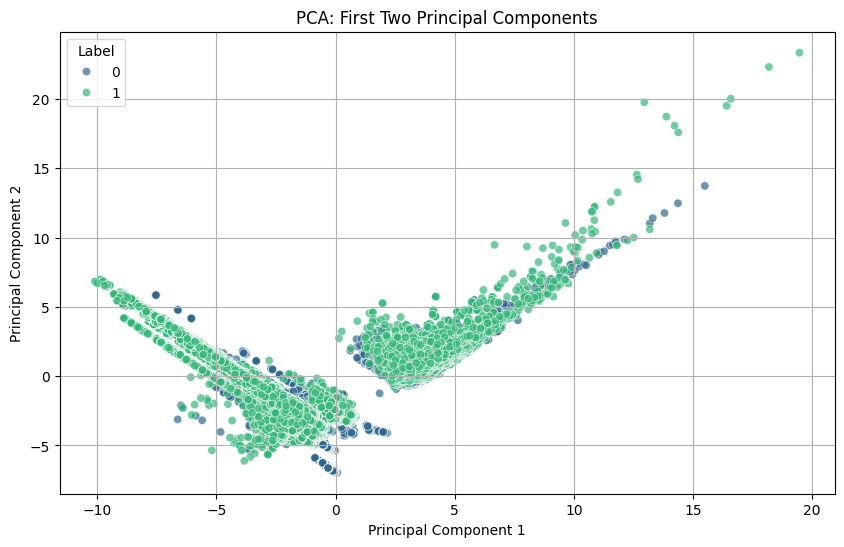

In [30]:
import seaborn as sns

# Create a DataFrame with the PCA results and the target labels
pca_results_df = pd.DataFrame(data=features_pca, columns=[f'PC{i + 1}' for i in range(optimal_components + 1)])
pca_results_df['label'] = target.values  # Add the target labels

# Create a 2D scatter plot of the first two principal components
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_results_df, x='PC1', y='PC2', hue='label', alpha=0.7, palette='viridis')
plt.title('PCA: First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Label')
plt.grid()
plt.show()

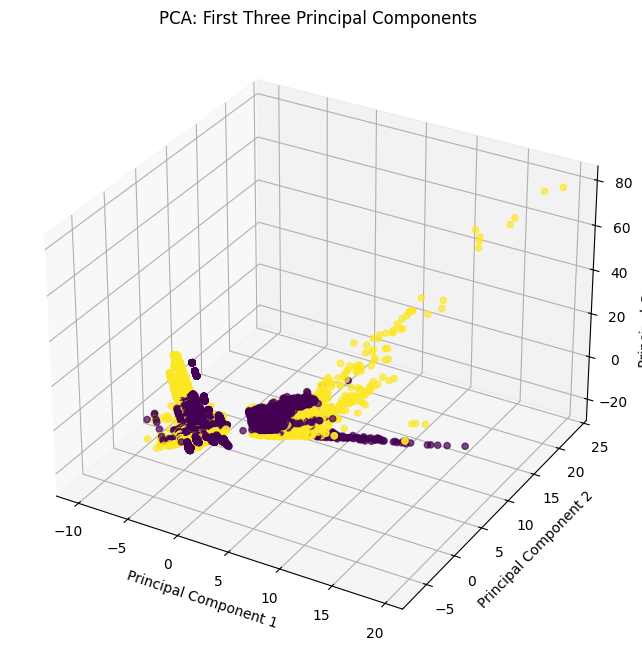

In [31]:
from mpl_toolkits.mplot3d import Axes3D

# Check if we have at least 3 components
if optimal_components + 1 >= 3:
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    ax.scatter(pca_results_df['PC1'], pca_results_df['PC2'], pca_results_df['PC3'], c=pca_results_df['label'].astype('category').cat.codes, alpha=0.7)
    
    ax.set_title('PCA: First Three Principal Components')
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    plt.show()
else:
    print("Not enough components for a 3D plot.")

In [32]:
# Calculate the total variance of the original scaled features
original_variance = np.var(features_scaled_df, axis=0).sum()

# Calculate the total variance retained by the PCA-transformed dataset
total_variance_retained = np.sum(pca.explained_variance_)

# Calculate the variance retention ratio
variance_retention_ratio = total_variance_retained / original_variance

print(f'Total Variance of Original Dataset: {original_variance:.4f}')
print(f'Total Variance Retained by PCA: {total_variance_retained:.4f}')
print(f'Variance Retention Ratio: {variance_retention_ratio:.4f} ({variance_retention_ratio * 100:.2f}%)')

Total Variance of Original Dataset: 201.0000
Total Variance Retained by PCA: 201.0011
Variance Retention Ratio: 1.0000 (100.00%)


In [ ]:
# Step 1: Data Preprocessing
# Import the necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('UNSW_NB15.csv')

# Inspect the dataset
print("Dataset Structure:")
print(df.info())
print("\nFirst few rows of the dataset:")
print(df.head())

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Separate features and the target label
X = df.drop(columns=['label'])  # Drop the target label from features
y = df['label']  # Isolate the target variable

# Identify categorical and numeric columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X.select_dtypes(exclude=['object']).columns.tolist()

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),  # Scale numeric features
        ('cat', OneHotEncoder(), categorical_cols)  # One-hot encode categorical features
    ]
)

# Fit and transform the data using the preprocessor
X_processed = preprocessor.fit_transform(X)

# Step 2: Applying PCA for Dimensionality Reduction
# Perform initial PCA analysis
pca = PCA()
X_pca = pca.fit_transform(X_processed)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

# Plot the cumulative explained variance to choose the optimal number of components
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Select the optimal number of components (at least 90% of variance)
optimal_components = (cumulative_variance >= 0.90).argmax() + 1
print(f"Optimal number of components to retain 90% of the variance: {optimal_components}")

# Transform the dataset with the selected number of components
pca_optimal = PCA(n_components=optimal_components)
X_reduced = pca_optimal.fit_transform(X_processed)

# Step 3: Visualize and Interpret the Reduced Dataset
# Visualize the first two principal components in a 2D scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=y, palette='viridis', alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA Scatter Plot of Reduced Data')
plt.show()

# Step 4: Analyze the Impact of PCA in Cybersecurity Context
# Variance retention analysis
total_variance_retained = cumulative_variance[optimal_components - 1] * 100
print(f"Total variance retained by the PCA-transformed dataset: {total_variance_retained:.2f}%")

# Potential applications and limitations discussion (text output, interpretation required)
print("\nInterpretation:")
print(f"Using PCA, we reduced the dataset to {optimal_components} components while retaining {total_variance_retained:.2f}% of the variance.")
print("In cybersecurity contexts, this reduced data can be useful in anomaly detection, malware classification, or simplifying model complexity, though some information loss may occur.")
print("Limitations include potential loss of non-linear relationships, as PCA is a linear transformation. Further analysis with non-linear methods may be needed depending on the data.")


Dataset Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15980 entries, 0 to 15979
Columns: 134 entries, Processor(_Total) DPC Rate to type
dtypes: float64(1), int64(65), object(68)
memory usage: 16.3+ MB
None

First few rows of the dataset:
   Processor(_Total) DPC Rate Processor(_Total) pct_ Idle Time  \
0                           0                      85.52083333   
1                           0                      73.85416667   
2                           0                      85.83333333   
3                           0                      88.54166667   
4                           0                      83.54166667   

  Processor(_Total) pct_ C3 Time Processor(_Total) pct_ Interrupt Time  \
0                              0                                     0   
1                              0                                     0   
2                              0                                     0   
3                              0                     

KeyboardInterrupt: 